In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from sklearn.preprocessing import MinMaxScaler

In [6]:
%matplotlib notebook

In [7]:
sensor1= './data/PJx3YW.AI51C5BP03_REAL.csv'
sensor2='./data/PJx3YW.AI51C5BP01_REAL.csv'
sensor3='./data/PJx3YW.AI51C5BP02_REAL.csv'
sensor4='./data/PJx3YW.AI51C5AT02_REAL.csv'
sensor5='./data/PJx3YW.AI51C5BT01_REAL.csv'
sensor6='./data/PJx3YW.AI51C5BT02_REAL.csv' #firstly used
sensor7='./data/PJx3YW.AI51C5BT03_REAL.csv'


dataset1 =  pd.read_csv(sensor1)
dataset2 =  pd.read_csv(sensor2)
dataset3 =  pd.read_csv(sensor3)
dataset4 =  pd.read_csv(sensor4)
dataset5 =  pd.read_csv(sensor5)
dataset6 =  pd.read_csv(sensor6)
dataset7 =  pd.read_csv(sensor7)

<IPython.core.display.Javascript object>


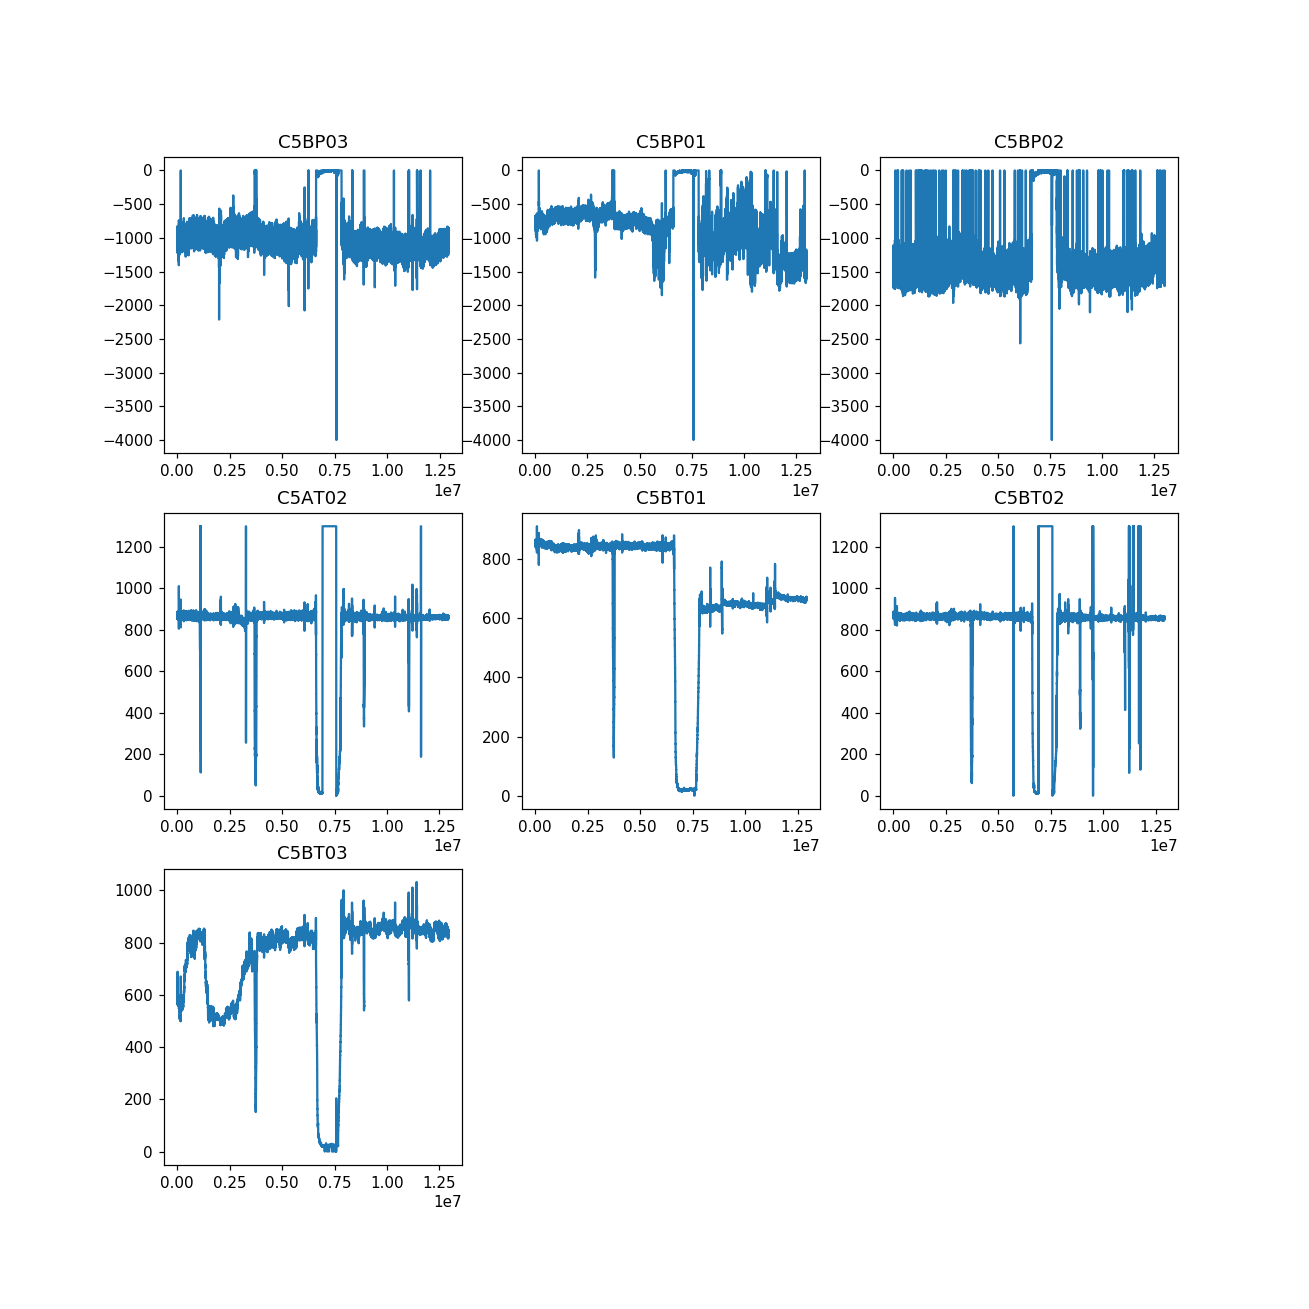

In [1031]:
X_train1 = dataset1.iloc[:,2].values
X_train2 = dataset2.iloc[:,2].values
X_train3 = dataset3.iloc[:,2].values
X_train4 = dataset4.iloc[:,2].values
X_train5 = dataset5.iloc[:,2].values
X_train6 = dataset6.iloc[:,2].values
X_train7 = dataset7.iloc[:,2].values

plt.figure(figsize=(12, 12))
plt.subplot(331)
plt.plot(range(len(X_train1)),X_train1)
plt.title('C5BP03')
plt.subplot(332)
plt.plot(range(len(X_train2)),X_train2)
plt.title('C5BP01')
plt.subplot(333)
plt.plot(range(len(X_train3)),X_train3)
plt.title('C5BP02')
plt.subplot(334)
plt.plot(range(len(X_train4)),X_train4)
plt.title('C5AT02')
plt.subplot(335)
plt.plot(range(len(X_train5)),X_train5)
plt.title('C5BT01')
plt.subplot(336)
plt.plot(range(len(X_train6)),X_train6)
plt.title('C5BT02')
plt.subplot(337)
plt.plot(range(len(X_train7)),X_train7)
plt.title('C5BT03')
plt.show()

<IPython.core.display.Javascript object>


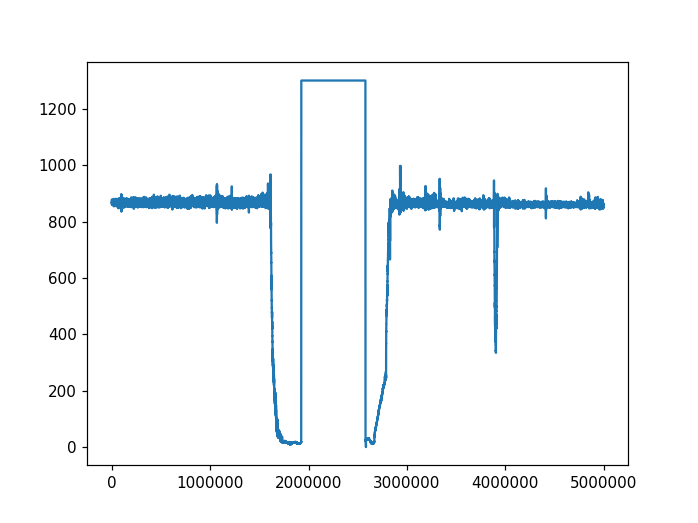

In [1008]:
X_test = dataset.iloc[5000000:10000000,2].values
plt.figure()
plt.plot(range(len(X_test)),X_test)
plt.show()

In [1009]:
seq_len = 64
batch_size = 64

In [1010]:
def generate_sequence(data,seq_len):
    
    num_sequence =  len(data) // seq_len
    
    all_sequence = []
    for i in range(num_sequence):
        all_sequence.append(data[i*seq_len:(i+1)*seq_len])
    return all_sequence 

In [1011]:
X_train_seq = generate_sequence(X_train,seq_len)
X_test_seq = generate_sequence(X_test,seq_len)

In [1012]:
def generate_batch(data , batch_size):
    
    num_batch =  len(data) // batch_size
    train_data = []
    for i in range(num_batch):
        train_data.append(data[i*batch_size:(i+1)*batch_size])
    return train_data

In [1013]:
X_train_batch = generate_batch(X_train_seq, batch_size)
X_test_batch = generate_batch(X_test_seq, batch_size)

In [1014]:
len(X_test_seq)

78125

In [1015]:
'''
----previous setting-----
num_inputs = seq_len # 28*28
neurons_hid1 = 64
neurons_hid2 = 32
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs
-------------------------
'''

num_inputs = seq_len # 28*28
neurons_hid1 = 50
neurons_hid2 = 45
neurons_hid3 = 40
neurons_hid4 = 35
neurons_hid5 = 30
neurons_hid6 = neurons_hid4 # Decoder Begins
neurons_hid7 = neurons_hid3
neurons_hid8 = neurons_hid2
neurons_hid9 = neurons_hid1
num_outputs = num_inputs


In [1016]:
tf.reset_default_graph() 

In [1017]:
actf = tf.nn.relu
act_func = tf.nn.relu
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
initializer = tf.variance_scaling_initializer()

In [1018]:
'''
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)
'''

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, neurons_hid4]), dtype=tf.float32)
w5 = tf.Variable(initializer([neurons_hid4, neurons_hid5]), dtype=tf.float32)
w6 = tf.Variable(initializer([neurons_hid5, neurons_hid6]), dtype=tf.float32)
w7 = tf.Variable(initializer([neurons_hid6, neurons_hid7]), dtype=tf.float32)
w8 = tf.Variable(initializer([neurons_hid7, neurons_hid8]), dtype=tf.float32)
w9 = tf.Variable(initializer([neurons_hid8, neurons_hid9]), dtype=tf.float32)
w10 = tf.Variable(initializer([neurons_hid9, num_outputs]), dtype=tf.float32)

In [1019]:
'''
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))
'''

b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(neurons_hid4))
b5 = tf.Variable(tf.zeros(neurons_hid5))
b6 = tf.Variable(tf.zeros(neurons_hid6))
b7 = tf.Variable(tf.zeros(neurons_hid7))
b8 = tf.Variable(tf.zeros(neurons_hid8))
b9 = tf.Variable(tf.zeros(neurons_hid9))
b10 = tf.Variable(tf.zeros(num_outputs))

In [1020]:
'''
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4
'''
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
hid_layer4 = act_func(tf.matmul(hid_layer3, w4) + b4)
hid_layer5 = act_func(tf.matmul(hid_layer4, w5) + b5)
hid_layer6 = act_func(tf.matmul(hid_layer5, w6) + b6)
hid_layer7 = act_func(tf.matmul(hid_layer6, w7) + b7)
hid_layer8 = act_func(tf.matmul(hid_layer7, w8) + b8)
hid_layer9 = act_func(tf.matmul(hid_layer8, w9) + b9)
output_layer = tf.matmul(hid_layer9, w10) + b10

In [1021]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [1022]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [ ]:
num_epochs = 100
learning_rate = 0.01
with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = len(X_train_batch)
        
        for iteration in range(num_batches):
            X_batch = X_train_batch[iteration]
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
    
    
    train_lost = []
    train_middle = []
    for i in range(len(X_train_batch)):
        X_batch =  X_train_batch[i]
        train_lost.append(loss.eval(feed_dict = {X:X_batch}))
        train_middle.append(hid_layer5.eval(feed_dict = {X:X_batch} ))
        
        
    test_lost = []
    test_middle = []
    for i in range(len(X_test_batch)):
        X_batch =  X_test_batch[i]
        test_lost.append(loss.eval(feed_dict = {X:X_batch}))
        test_middle.append(hid_layer5.eval(feed_dict = {X:X_batch} ))

In [880]:
train_middle = np.array(train_middle).reshape(len(train_middle)*len(train_middle[0]), neurons_hid5);
test_middle = np.array(test_middle).reshape(len(test_middle)*len(test_middle[0]), neurons_hid5);

In [881]:
np.shape(test_middle)

(78080, 30)

In [882]:
def distance(data):
    result = []
    for i in range(len(data) - 1):
        result.append(np.linalg.norm(data[i]-data[i+1]))
    return result

In [894]:
dist  = distance(train_middle)

In [952]:
%matplotlib notebook

<IPython.core.display.Javascript object>


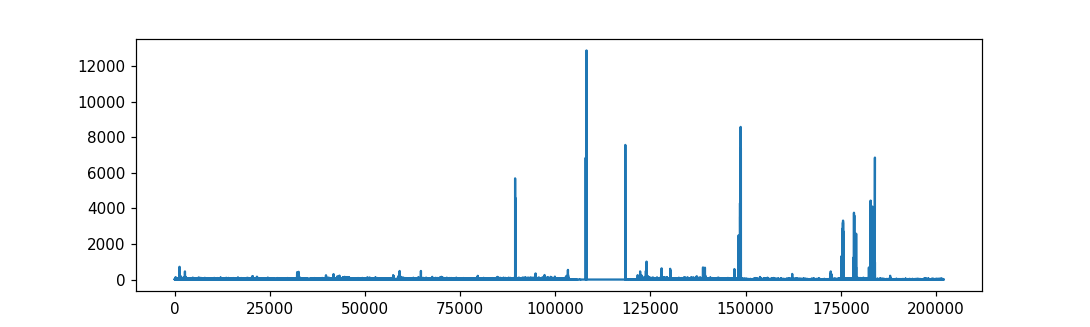

In [955]:
plt.figure(figsize=(10, 3))
plt.plot(dist)
plt.show()

<IPython.core.display.Javascript object>


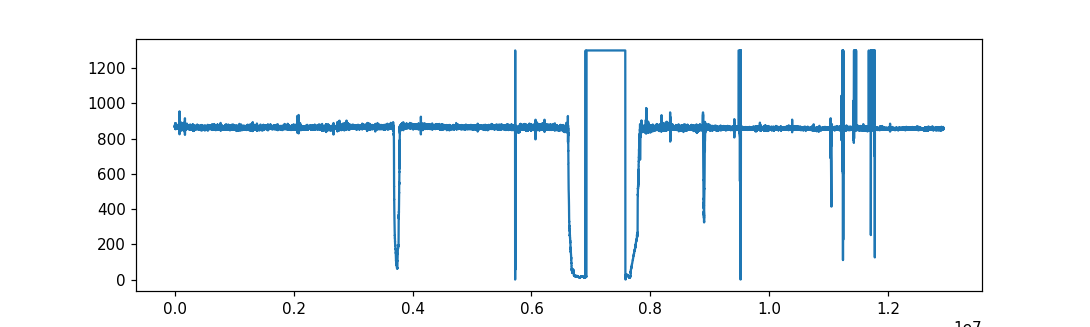

In [956]:
plt.figure(figsize=(10, 3))
plt.plot(range(len(X_train)),X_train)
plt.show()

In [1]:
def split_data(original_data ,distance,seq_len,threshold):
    breakpoint = []
    for i in range (len(distance)):
        if distance[i]> threshold and distance[i] <800 :
            breakpoint.append(i*seq_len)
    return breakpoint

In [2]:
def plot_breakpoint(break_point,data):
    plt.figure(figsize=(10, 3))
    plt.plot(range(len(data)),data)
    for xc in break_point:
        plt.axvline(x=xc, color='r', linestyle='--')
    plt.show

In [3]:
breakpoint = split_data(X_train,dist, seq_len,250)

NameError: name 'X_train' is not defined

In [1]:
plot_breakpoint(breakpoint, X_train)

NameError: name 'plot_breakpoint' is not defined